In [19]:
import numpy as np 
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
df=pd.read_csv('Covid Data.csv')
df.tail()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
1048570          2   40        97         2  ...       2        2   
1048571          2   51        97         2  ...       2        2   
1048572          2   55        97         2  ...       2        2   
1048573          2   28        97         2  ...       2        2   
1048574          2   52        97         2  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
1048570             2              2               2        2              2   
1048571             1              2               2        2              2   
1048572             2              2               2        2              2   
1048573             2              2               2        2              2   
1048574             2              2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
1048570        2                     7   97  
1048571        2                     7    2  
1048572        2                     7   97  
1048573        2                     7   97  
1048574        2                     7   97  

[5 rows x 21 columns]

1. What is the average age of the patients?

In [22]:
df['AGE'].mean()

41.794102472403026

2. what is the minimum and maximum of the age in the dataset

In [23]:
df['AGE'].min()

0

In [24]:
df['AGE'].max()

121

3.How many unique patients are there in the dataset?

In [74]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               400
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
Outcomes                  2
New                       2
Patient                   2
dtype: int64

4.What is the distribution of patient types (returned home vs. hospitalized)?

<Axes: xlabel='PATIENT_TYPE', ylabel='count'>

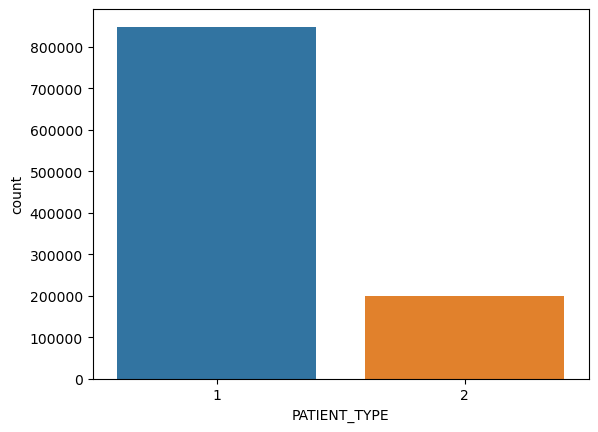

In [76]:
 df['PATIENT_TYPE'].value_counts()
sns.countplot(x='PATIENT_TYPE',data=df)

5.What are the top three pre-existing conditions among the patients?

In [73]:
selected_columns=df.iloc[:,list(range(9,19))+[6]]
d=selected_columns.eq(1)
disease=d.sum()
disease.nlargest(3)

HIPERTENSION    162729
OBESITY         159816
PNEUMONIA       140038
dtype: int64

6. How many patients have missing values for the "usmr" column?

In [79]:
(df['USMER']==97).sum()

0

In [80]:
(df['USMER']==99).sum()

0

7. Can we visualize the correlation between different pre-existing conditions using a heatmap?


<Axes: >

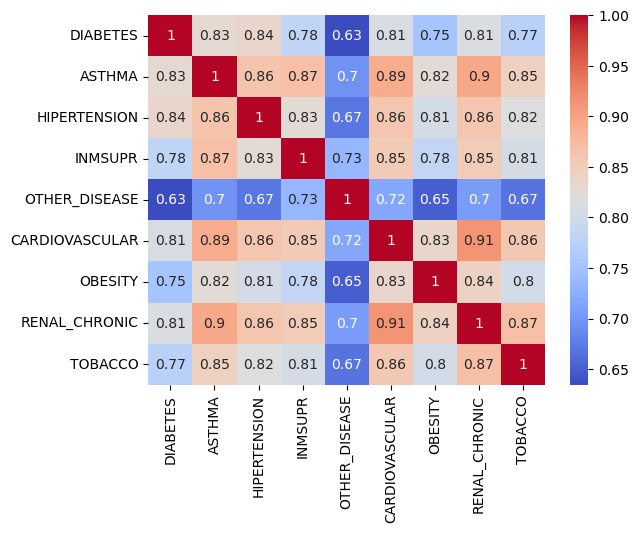

In [29]:
condition_columns = ['DIABETES', 'ASTHMA', 'HIPERTENSION', 'INMSUPR', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
condition_matrix=df[condition_columns].corr()
sns.heatmap(condition_matrix,annot=True, cmap="coolwarm")


8.How does age correlate with the different COVID test findings?

In [30]:
test_finding_columns = ['INTUBED', 'PNEUMONIA', 'DIABETES', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
age_and_test_findings = df[['AGE'] + test_finding_columns]
age_and_test_findings.corr()


AGE   INTUBED  PNEUMONIA  DIABETES    ASTHMA  \
AGE            1.000000 -0.317945  -0.073127  0.004422  0.022715   
INTUBED       -0.317945  1.000000   0.079743 -0.009215 -0.023446   
PNEUMONIA     -0.073127  0.079743   1.000000 -0.004484 -0.005392   
DIABETES       0.004422 -0.009215  -0.004484  1.000000  0.829349   
ASTHMA         0.022715 -0.023446  -0.005392  0.829349  1.000000   
HIPERTENSION  -0.004964 -0.007628  -0.004799  0.835018  0.864264   
OBESITY        0.015500 -0.020217  -0.004276  0.752739  0.824631   
RENAL_CHRONIC  0.020124 -0.019309  -0.005287  0.812657  0.895050   
TOBACCO        0.021263 -0.022428  -0.004325  0.771763  0.845067   

               HIPERTENSION   OBESITY  RENAL_CHRONIC   TOBACCO  
AGE               -0.004964  0.015500       0.020124  0.021263  
INTUBED           -0.007628 -0.020217      -0.019309 -0.022428  
PNEUMONIA         -0.004799 -0.004276      -0.005287 -0.004325  
DIABETES           0.835018  0.752739       0.812657  0.771763  
ASTHMA             0.864264  0.824631       0.895050  0.845067  
HIPERTENSION       1.000000  0.805127       0.860477  0.816539  
OBESITY            0.805127  1.000000       0.842466  0.801834  
RENAL_CHRONIC      0.860477  0.842466       1.000000  0.868761  
TOBACCO            0.816539  0.801834       0.868761  1.000000

9.What is the distribution of ages among different outcomes (recovered, died)?

In [69]:
def outcome(x):
    if x == 1:
        return 'True'
    else:
        return 'False'

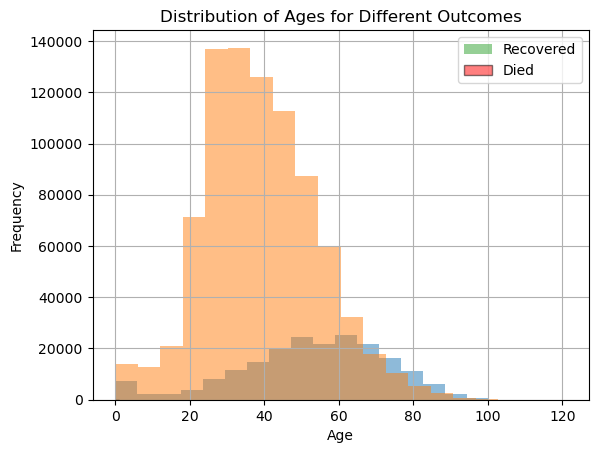

In [70]:
df['Outcomes']=df['PATIENT_TYPE'].apply(outcome)
df.groupby('Outcomes')['AGE'].hist(alpha=0.5, bins=20)
df[df['Outcomes'] == 'Recovered']['AGE'].hist(alpha=0.5, bins=20, label='Recovered')
df[df['Outcomes'] == 'Died']['AGE'].hist(alpha=0.5, bins=20, label='Died',color='red', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages for Different Outcomes')
plt.legend()
plt.show()

10.Can we create a bar chart to show the count of patients in each medical unit?

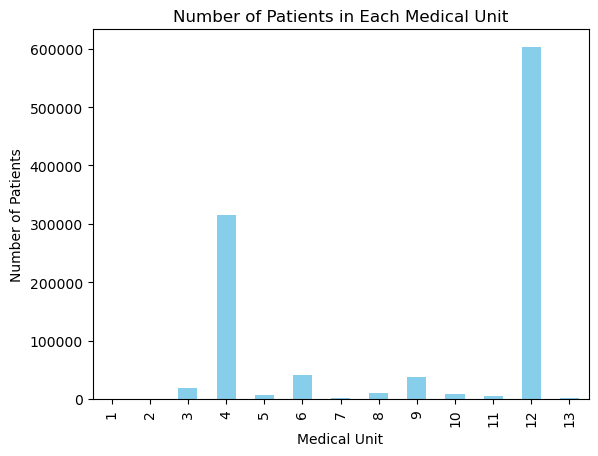

In [71]:
import matplotlib.pyplot as plt
medical_unit_counts = df['MEDICAL_UNIT'].value_counts().sort_index()
medical_unit_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Medical Unit')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Medical Unit')
plt.show()


11. How does the distribution of ages vary between male and female patients?


<Axes: xlabel='AGE', ylabel='Density'>

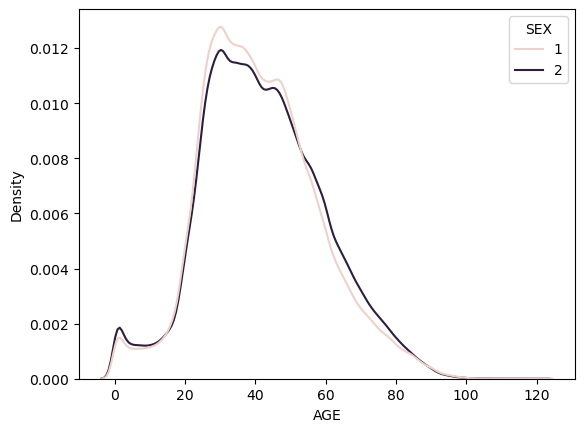

In [60]:
sns.kdeplot(x='AGE',data=df,hue='SEX')

12.Can we visualize the precentage of smokers among th patients?

In [61]:
def smokers(x):
    if x == 1:
        return 'True'
    else:
        return 'False'


In [62]:
df['New']=df['TOBACCO'].apply(smokers)

([<matplotlib.patches.Wedge at 0x1c3011a0580>,
 [Text(-1.065038740770334, 0.2751226647485479, 'False'),
  Text(1.065038753649754, -0.27512261489048606, 'True')],
 [Text(-0.5809302222383639, 0.1500669080446625, '92.0%'),
  Text(0.5809302292635021, -0.15006688084935602, '8.0%')])

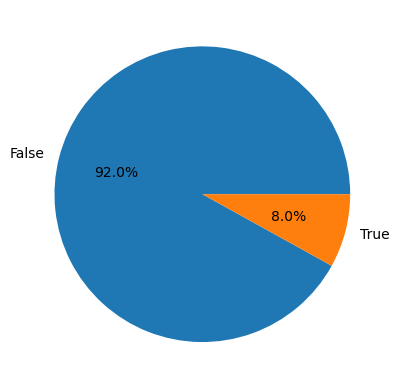

In [38]:
smoker_counts = df['New'].value_counts()
plt.pie(smoker_counts,labels=smoker_counts.index,autopct='%1.1f%%')

13. What is the average age of patients with and without diabetes?


In [39]:
def diabetes(x):
    if x == 1:
        return 'True'
    else:
        return 'False'


In [40]:
df['Patient']=df['DIABETES'].apply(diabetes)

In [41]:
df.groupby('Patient')['AGE'].mean()

Patient
False    39.741129
True     56.964221
Name: AGE, dtype: float64

14.How does the distribution of ages differ between ICU-admitted and non-ICU-admitted patients?

In [42]:
icu=df['ICU']

In [43]:
icu

0          97
1          97
2           2
3          97
4          97
           ..
1048570    97
1048571     2
1048572    97
1048573    97
1048574    97
Name: ICU, Length: 1048575, dtype: int64

In [83]:
mask = (df['ICU'] == 97) | (df['ICU'] == 99)
df.drop(df[mask].index,inplace=True)

In [84]:
df

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
2            2             1    2             2  09/06/2020        1   
5            2             1    1             2  9999-99-99        2   
8            2             1    1             2  9999-99-99        2   
9            2             1    1             2  9999-99-99        2   
11           2             1    2             2  9999-99-99        2   
...        ...           ...  ...           ...         ...      ...   
1048553      2            13    1             2  9999-99-99        2   
1048554      2            13    1             2  9999-99-99        2   
1048567      1            13    1             2  9999-99-99        2   
1048569      1            13    1             2  9999-99-99        2   
1048571      1            13    2             2  9999-99-99        2   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
2                2   55        97         1  ...       2        2   
5                1   40         2         2  ...       2        2   
8                2   37         2         1  ...       2        2   
9                2   25         2         2  ...       2        2   
11               2   24        97         2  ...       2        2   
...            ...  ...       ...       ...  ...     ...      ...   
1048553          1   61         2         1  ...       2        2   
1048554          1   63         2         2  ...       1        2   
1048567          2   23         2         1  ...       2        2   
1048569          2   56         2         1  ...       2        2   
1048571          2   51        97         2  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
2                   2              2               2        2              2   
5                   2              2               2        2              2   
8                   1              2               2        1              2   
9                   2              2               2        2              2   
11                  2              2               2        2              2   
...               ...            ...             ...      ...            ...   
1048553             1              2               2        2              2   
1048554             2              2               2        1              2   
1048567             2              2               2        1              2   
1048569             2              2               2        2              2   
1048571             1              2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
2              2                     3    2  
5              2                     3    2  
8              2                     3    2  
9              2                     3    2  
11             2                     3    2  
...          ...                   ...  ...  
1048553        2                     7    2  
1048554        2                     7    2  
1048567        2                     7    2  
1048569        2                     7    2  
1048571        2                     7    2  

[192543 rows x 21 columns]

<Axes: xlabel='ICU', ylabel='AGE'>

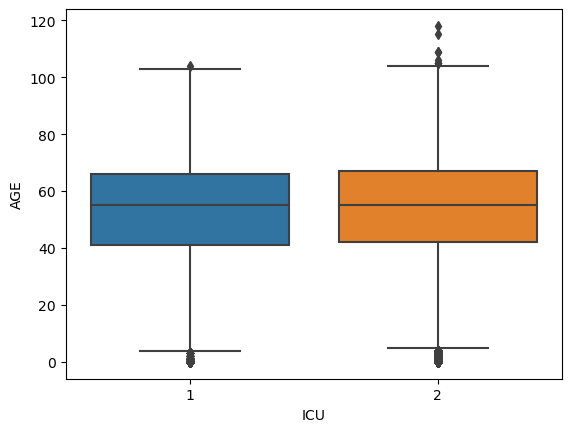

In [85]:
sns.boxplot(x='ICU', y='AGE', data=df)

15. Can we visualize the trend of COVID cases over time (if time information is available)?


In [47]:
df['DATE_DIED']= pd.to_datetime(df['DATE_DIED'],errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_5232\462176567.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_DIED']= pd.to_datetime(df['DATE_DIED'],errors='coerce')


In [48]:
df.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  AGE  \
0      2             1    1             1 2020-03-05       97          1   65   
1      2             1    2             1 2020-03-06       97          1   72   
2      2             1    2             2 2020-09-06        1          2   55   
3      2             1    1             1 2020-12-06       97          2   53   
4      2             1    2             1 2020-06-21       97          2   68   

   PREGNANT  DIABETES  ...  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0         2         2  ...              2               2        2   
1        97         2  ...              2               2        1   
2        97         1  ...              2               2        2   
3         2         2  ...              2               2        2   
4        97         1  ...              2               2        2   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  Outcomes    New  Patient  
0              2        2                     3   97      True  False    False  
1              1        2                     5   97      True  False    False  
2              2        2                     3    2     False  False     True  
3              2        2                     7   97      True  False    False  
4              2        2                     3   97      True  False     True  

[5 rows x 24 columns]

In [49]:
date=df.groupby('DATE_DIED').size()

<Axes: xlabel='DATE_DIED'>

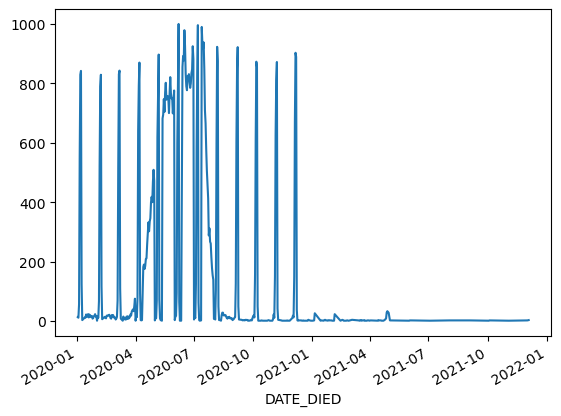

In [50]:
date.plot(kind='line')

16. there a difference in age distribution between pregnant and non-pregnant patients?


<Axes: xlabel='PREGNANT', ylabel='AGE'>

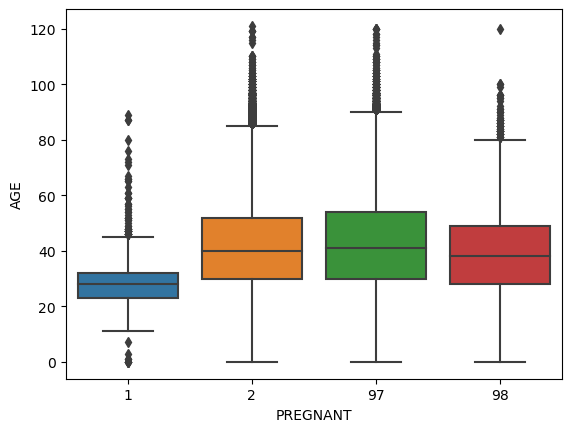

In [51]:
sns.boxplot(x='PREGNANT', y='AGE', data=df)

17.How does the distribution of ages vary between different outcomes (recovered, died) for diabetic patients?

<Axes: xlabel='DIABETES', ylabel='AGE'>

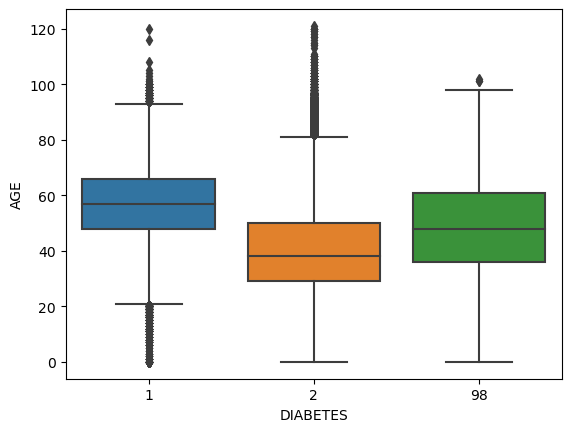

In [52]:
sns.boxplot(x='DIABETES', y='AGE', data=df)